In [1]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']]
y = (iris.target == 2)

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1,random_state=42))
svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [2]:
X_new = [[5.5, 1.7],[5.0,1.5]]
svm_clf.predict(X_new)

C:\Users\Mauri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([ True, False])

In [3]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X,y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10000, random_state=42)
)
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

In [4]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel='poly', degree=3, coef0=1, C=5)
)
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

## Under the Hood

$\mathbf{\theta}^T \mathbf{x} = \theta_0 x_0 +\theta_1 x_1 + ... + \theta_n x_n$ being $x_0$ the added bias term equal to 1. So the equation can be replaced by $\mathbf{w}^T\mathbf{x} + b = w_1x_1+w_2x_2 + ... + w_nx_n + b$ where b is the bias term equal to $\theta_0$ and $\mathbf{w}^T = [\theta_1 , ... , \theta_n]$ \
So training -> find b and w

So if $t^{(i)} = -1 $ when $y^{(i)} = 0 $ (negative class) and $t^{(i)} = 1 $ when $y^{(i)} = 1 $ (positive class), the restriction can be writed as $t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b) >= 1$, so the goal is to minimize $\frac{1}{2}\mathbf{w}^T\mathbf{w}$ (differenciable) while subjected to that restriction for $i=1,2,...,n$

$\zeta^{(i)}$ -> how much the $i^{th}$ variable is allowed to violate the margin

C hyperparameter controls the trade-off between a small $\zeta$ and a small $\frac{1}{2}\mathbf{w}^T\mathbf{w}$

So the goal becomes minimizing the $\frac{1}{2}\mathbf{w}^T\mathbf{w} + C\sum{i=1}{m}\zeta^{(i)}$ subject to $t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b) >= 1 - \zeta^{(i)}$ and $\zeta^{(i)} >= 0 $ for $i=1,2,...,m$

### The Dual problem
Is faster to solve than the primal problem when the number of training instances is smaller than the number of features and also it makes the kernel trick possible.

minimize $\frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha^{(i)}\alpha^{(j)}t^{(i)}t^{(j)}x^{(i)^T}x^{(j)} - \sum_{i=1}^{m}\alpha^{(i)}$ subjected to $\alpha^{(i)} >= 0 $ for all $i=1,2,...,m$ and $\sum_{i=1}^{m}\alpha^{(i)}t^{(i)}=0$ . This is solved using a QP solver (finds $\hat{\alpha}$ and then $\mathbf{\hat{w}}$ and $\hat{b}$ are calculated as $$\mathbf{\hat{w}} = \sum_{i=1}^{m} \hat{\alpha}^{(i)}t^{(i)}\mathbf{x}^{(i)} $$ $$\hat{b} = \frac{1}{n_s} \sum_{i=1}^{m}(t^{(i)}-\mathbf{\hat{w}}\mathbf{x}^{(i)})$$ ($n_s$:number of support vectors)

Kernel: function capable of computing $\phi(\mathbf{a})^T\phi(\mathbf{b})$ based only on $\mathbf{a}$ and $\mathbf{b}$ without computing (or even knowing) the transformation $\phi$

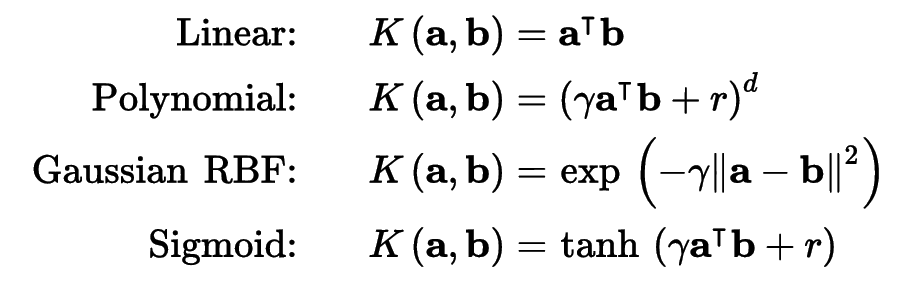

$h_{\hat{w},\hat{b}} = \mathbf{\hat{w}}^{T}\phi(x^{(n)}) + \hat{b} = (\sum_{i=1}^{m} \hat{\alpha}^{(i)}t^{(i)}\phi(\mathbf{x}^{(i)}))^T \phi(x^{(n)}) + \hat{b}$ \
$= \sum_{i=1}^{m} \hat{\alpha}^{(i)}t^{(i)}\phi(\mathbf{x}^{(i)})^T \phi(x^{(n)}) + \hat{b}$ \
$=  \sum_{i=1}^{m} \hat{\alpha}^{(i)}t^{(i)} K(x^{(i)},x^{(j)}) + \hat{b}$ \
and $\alpha^{(i)}\not=0$ only for support vectors \
$\hat{b} = \frac{1}{n_s} \sum_{i=1}^{m}(t^{(i)}-\mathbf{\hat{w}}\phi(\mathbf{x}^{(i)}))$ \
$ = \frac{1}{n_s} \sum_{i=1}^{m}(t^{(i)}-(\sum_{j=1}^{m} \hat{\alpha}^{(j)}t^{(j)}\phi(\mathbf{x}^{(j)}))^T\phi(\mathbf{x}^{(i)}))$ \
$= \frac{1}{n_s} \sum_{i=1}^{m}(t^{(i)}-(\sum_{j=1}^{m} \hat{\alpha}^{(j)}t^{(j)}K(\mathbf{x}^{(i)},\mathbf{x}^{(j)})$

## Excercises
1. What is the fundamental idea behind support vector machines?
   The idea is to fit the widest possible street between the classes
2. What is a support vector?
   They are the instances on the "street"
3. Why is it important to scale the inputs when using SVMs?
   Because the side effect of having different scales is that it can make the street very narrow
4. Can	an	SVM	classifier	output	a	confidence	score	when	it	classifies	an
 instance?	What	about	a	probability?
    The decision_function gives the confidence score as the distance between the instance and
   the decision boundary. It isn't possible to output probability as if, but a model of probability
   can be constructed using cross fold validation with log classification once the model is fully trained.
5. How can you choose between LinearSVC, SVC, and SGDClassifier?
   - LinearSVC: optimized for linear SVMs
   - SVC: accepts the kernel trick, doesn't scale well with instances , it does it with features
   - SGDClassifier: implements sgd, it's more flexible and supports incremental learning
6. Say you’ve trained an SVM classifier with an RBF kernel, but it seems to
 underfit the training set. Should you increase or decrease γ (gamma)? What
 about C?
    Augment gamma or C or both
7. What does it mean for a model to be ϵ-insensitive?
   The instances inside the margin doesn't affect the model
8. What	is	the	point	of	using	the	kernel	trick?
   It allows using SVM when the data it's not linearly separable without having to transform it.

9. Train	a	LinearSVC	on	a	linearly	separable	dataset.	Then	train	an	SVC	and
 a	SGDClassifier	on	the	same	dataset.	See	if	you	can	get	them	to
 produce	roughly	the	same	model.

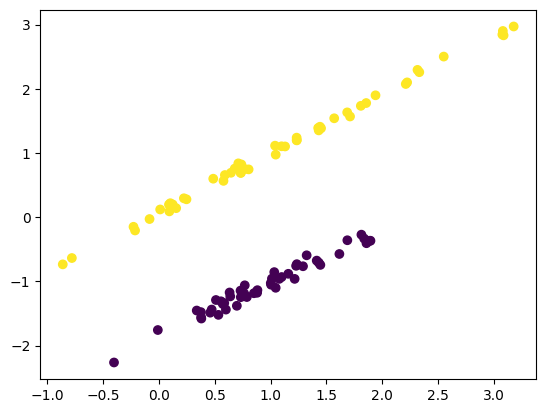

In [61]:
from sklearn.datasets import make_classification
import numpy as np
from matplotlib import pyplot as plt

X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
plt.scatter(X[:,0],X[:,1],c=y)

In [69]:
linear_svc = LinearSVC(loss='hinge',C=5,random_state=42)
linear_svc.fit(X,y)

LinearSVC(C=5, loss='hinge', random_state=42)

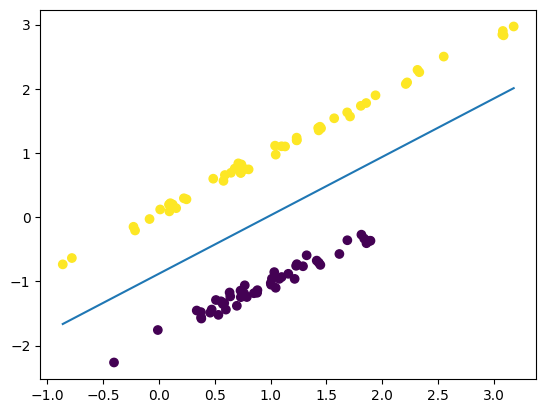

In [70]:
w = linear_svc.coef_[0]
b = linear_svc.intercept_[0]
decision_boundary = np.ndarray((100,2))
decision_boundary[:,0] = np.linspace(X[:,0].min(),X[:,0].max(),100)
decision_boundary[:,1] = -(w[0]*decision_boundary[:,0] +b) / w[1]
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(decision_boundary[:,0],decision_boundary[:,1])
plt.show()

In [71]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

svc = SVC(C=5,kernel='linear',random_state=42)
sgd = SGDClassifier(alpha=0.05,random_state=42)
svc.fit(X,y)
sgd.fit(X,y)

SGDClassifier(alpha=0.05, random_state=42)

In [72]:
print(f'Linear SVC intercept: {b},coef: {w}')
print(f'SVC intercept: {svc.intercept_[0]},coef: {svc.coef_[0]}')
print(f'SGD intercept: {sgd.intercept_[0]},coef: {sgd.coef_[0]}')

Linear SVC intercept: 1.015583090640118,coef: [-1.04930661  1.15174082]
SVC intercept: 1.0247625178180195,coef: [-1.02591875  1.17223141]
SGD intercept: 0.9391179235588977,coef: [-0.93667616  1.14446633]


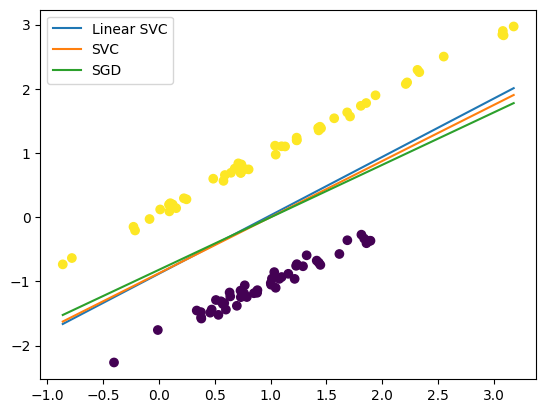

In [74]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(decision_boundary[:,0],decision_boundary[:,1],label='Linear SVC')
plt.plot(np.linspace(X[:,0].min(),X[:,0].max(),100),-(svc.coef_[0][0]*decision_boundary[:,0] +svc.intercept_[0]) / svc.coef_[0][1],label='SVC')
plt.plot(np.linspace(X[:,0].min(),X[:,0].max(),100),-(sgd.coef_[0][0]*decision_boundary[:,0] +sgd.intercept_[0]) / sgd.coef_[0][1],label='SGD')
plt.legend()
plt.show()